# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
pwd

'/Users/jordanromnes/Desktop/module_5/FInancial_Planning_Assignment'

In [4]:
# Load .env enviroment variables
the_path = ('/Users/jordanromnes/Desktop/module_5/FInancial_Planning_Assignment/.git/k.env')
load_dotenv(the_path)

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [5]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [6]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [7]:
# Fetch current BTC price
btc_response = requests.get(btc_url)
btc_data = btc_response.json()
my_btc_price = btc_data['data']['1']['quotes']['USD']['price']
# Fetch current ETH price
eth_response = requests.get(eth_url)
eth_data = eth_response.json()
my_eth_price = eth_data['data']['1027']['quotes']['USD']['price']
# Compute current value of my crpto
my_btc_value = my_btc * my_btc_price
my_eth_value = my_eth * my_eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $52766.40
The current value of your 5.3 ETH is $11894.74


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [9]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [10]:
# Format current date as ISO format
today = pd.Timestamp("2023-12-15", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
portfolio_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = portfolio_df[portfolio_df['symbol']=='AGG'].drop('symbol', axis=1)
SPY = portfolio_df[portfolio_df['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
portfolio_df = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
portfolio_df.head()

AGG                                            \
                           close   high    low trade_count  open    volume   
timestamp                                                                    
2023-12-15 05:00:00+00:00  98.69  98.88  98.59       37771  98.8  10079203   

                                         SPY                               \
                                vwap   close   high       low trade_count   
timestamp                                                                   
2023-12-15 05:00:00+00:00  98.733271  469.33  470.7  467.4263      667849   

                                                         
                             open     volume       vwap  
timestamp                                                
2023-12-15 05:00:00+00:00  469.49  141529826  469.34935

In [65]:
# Pick AGG and SPY close prices
agg_close_price = float(portfolio_df.iloc[0,0])
spy_close_price = float(portfolio_df.iloc[0,7])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $98.69
Current SPY closing price: $469.33


In [66]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $23466.50
The current value of your 200 AGG shares is $19738.00


### Savings Health Analysis

In [67]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
data = {
    'amount': [my_btc_value + my_eth_value, my_spy_value + my_agg_value]
}

# Create savings DataFrame
df_savings = pd.DataFrame(data, index=['Crypto', 'Shares'])

# Display savings DataFrame
display(df_savings)

,amount
Crypto,64661.137
Shares,43204.500


array([<Axes: ylabel='amount'>], dtype=object)

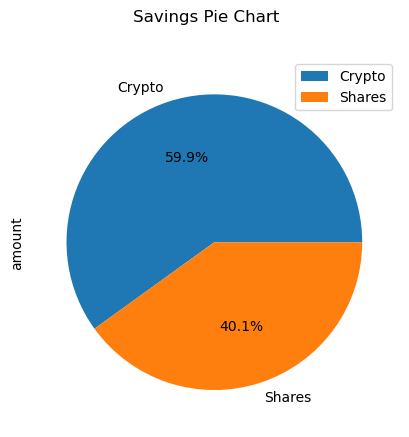

In [68]:
# Plot savings pie chart
df_savings.plot(kind='pie', y='amount', autopct='%1.1f%%', subplots=True, title='Savings Pie Chart')

In [69]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings['amount'].sum()

# Validate saving health
saving_difference = emergency_fund - total_savings

if total_savings > emergency_fund:
    print("Congratulations! You have plenty money in your emergency fund! Treat yourself!!")
elif total_savings == emergency_fund:
    print("Congratulations! You have exactly the right amount in your emergency fund! There's always room for more!")
else:
    print(f"You are ${abs(saving_difference):.2f} away from reaching your emergency fund goal.")

Congratulations! You have plenty money in your emergency fund! Treat yourself!!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [70]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [71]:
# Get 5 years' worth of historical data for SPY and AGG
timeframe = "1Day"
ticker = ['SPY', 'AGG']
df_stock_data = alpaca.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=10000
).df

# Reorganize the DataFrame
# Separate ticker data
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

# Display sample data
df_stock_data.head()

SPY                                      \
                              close    high     low trade_count    open   
timestamp                                                                 
2016-05-02 04:00:00+00:00  207.9700  208.18  206.41      263586  206.92   
2016-05-03 04:00:00+00:00  206.1592  206.80  205.28      377523  206.52   
2016-05-04 04:00:00+00:00  205.0100  205.85  204.42      345266  204.99   
2016-05-05 04:00:00+00:00  204.9700  205.98  204.47      280626  205.56   
2016-05-06 04:00:00+00:00  205.7200  205.77  203.88      340162  204.06   

                                                      AGG                      \
                              volume        vwap    close      high       low   
timestamp                                                                       
2016-05-02 04:00:00+00:00   64747229  207.305695  110.605  110.7400  110.5200   
2016-05-03 04:00:00+00:00  108050343  206.309997  110.810  110.9450  110.7500   
2016-05-04 04:00:00+00:00   94995641  205.086315  110.860  110.9315  110.7595   
2016-05-05 04:00:00+00:00   68425268  205.140615  111.140  111.1600  110.8010   
2016-05-06 04:00:00+00:00   90999800  204.943796  110.970  111.1200  110.9700   

                                                                    
                          trade_count    open   volume        vwap  
timestamp                                                           
2016-05-02 04:00:00+00:00       15122  110.74  3608552  110.626939  
2016-05-03 04:00:00+00:00       15663  110.89  3128774  110.864495  
2016-05-04 04:00:00+00:00       13984  110.91  3096337  110.877983  
2016-05-05 04:00:00+00:00       15708  110.92  3052967  111.030002  
2016-05-06 04:00:00+00:00       12697  111.12  2922700  111.027631

In [72]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [73]:
# Printing the simulation input data
MC_30_year.portfolio_data.head()

SPY                                      \
                              close    high     low trade_count    open   
timestamp                                                                 
2016-05-02 04:00:00+00:00  207.9700  208.18  206.41      263586  206.92   
2016-05-03 04:00:00+00:00  206.1592  206.80  205.28      377523  206.52   
2016-05-04 04:00:00+00:00  205.0100  205.85  204.42      345266  204.99   
2016-05-05 04:00:00+00:00  204.9700  205.98  204.47      280626  205.56   
2016-05-06 04:00:00+00:00  205.7200  205.77  203.88      340162  204.06   

                                                                   AGG  \
                              volume        vwap daily_return    close   
timestamp                                                                
2016-05-02 04:00:00+00:00   64747229  207.305695          NaN  110.605   
2016-05-03 04:00:00+00:00  108050343  206.309997    -0.008707  110.810   
2016-05-04 04:00:00+00:00   94995641  205.086315    -0.005574  110.860   
2016-05-05 04:00:00+00:00   68425268  205.140615    -0.000195  111.140   
2016-05-06 04:00:00+00:00   90999800  204.943796     0.003659  110.970   

                                                                            \
                               high       low trade_count    open   volume   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.7400  110.5200       15122  110.74  3608552   
2016-05-03 04:00:00+00:00  110.9450  110.7500       15663  110.89  3128774   
2016-05-04 04:00:00+00:00  110.9315  110.7595       13984  110.91  3096337   
2016-05-05 04:00:00+00:00  111.1600  110.8010       15708  110.92  3052967   
2016-05-06 04:00:00+00:00  111.1200  110.9700       12697  111.12  2922700   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  110.626939          NaN  
2016-05-03 04:00:00+00:00  110.864495     0.001853  
2016-05-04 04:00:00+00:00  110.877983     0.000451  
2016-05-05 04:00:00+00:00  111.030002     0.002526  
2016-05-06 04:00:00+00:00  111.027631    -0.001530

In [74]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.014106,1.000504,1.001962,0.997809,0.997293,1.003624,1.001045,1.008232,1.007845,0.996996,...,0.994605,0.995763,0.990161,1.012495,0.998733,1.014806,0.990485,1.001402,1.005030,1.007548
2,1.013633,0.996683,1.001880,0.989833,0.988677,1.002961,0.998882,1.008563,0.999169,0.988222,...,0.999528,1.005144,0.994483,1.012175,1.001007,1.024135,0.995951,1.013421,1.016921,1.013516
3,1.018431,1.013726,1.015117,0.998699,0.979810,1.005286,0.988642,1.004505,0.988096,0.983330,...,0.992694,0.999727,0.998294,1.021159,1.007411,1.020599,1.005155,1.008451,1.015061,1.009767
4,1.026758,1.006933,1.010556,0.990072,0.974253,1.011605,0.994711,1.010798,0.987329,0.985871,...,0.997999,0.992907,1.012331,1.016888,1.013763,1.018449,0.998318,1.013182,1.015950,1.003346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,50.129210,9.927458,12.697014,22.715701,15.078207,8.221269,46.233830,6.391848,7.792247,12.949454,...,10.087047,13.262300,28.979857,17.282443,83.666961,30.600258,5.899504,26.250707,28.732089,14.893917
7557,49.802889,10.023575,12.687575,22.611014,15.074549,8.179591,46.438056,6.379954,7.806849,12.921408,...,10.123548,13.362712,29.019596,17.306730,85.147629,30.383102,5.918565,26.326648,28.843619,14.884856
7558,49.794560,9.957945,12.633516,22.313852,14.965165,8.193979,46.587286,6.380068,7.815567,12.978664,...,10.151643,13.310893,29.193814,17.269742,85.744968,30.495289,5.925320,26.354601,28.828033,14.907293
7559,50.070960,10.044095,12.739150,22.446351,14.713566,8.218683,46.478184,6.332666,7.804126,12.987633,...,10.133311,13.435689,29.168023,17.493073,85.371842,30.265007,5.928775,26.334893,28.585937,15.086775


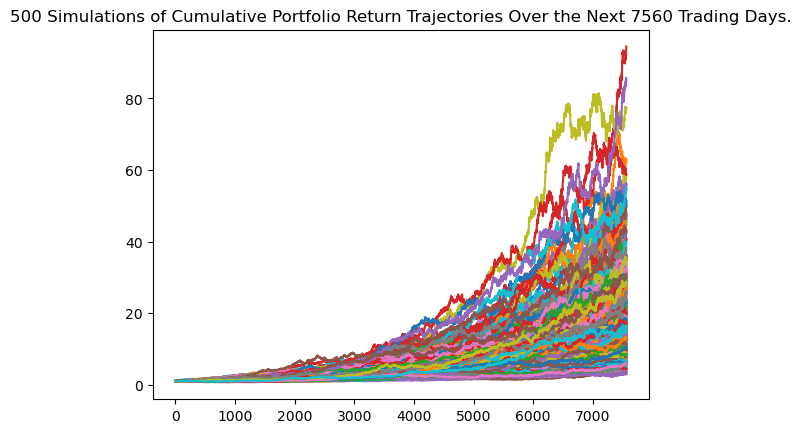

In [75]:
# Plot simulation outcomes
line_plot = MC_30_year.plot_simulation()

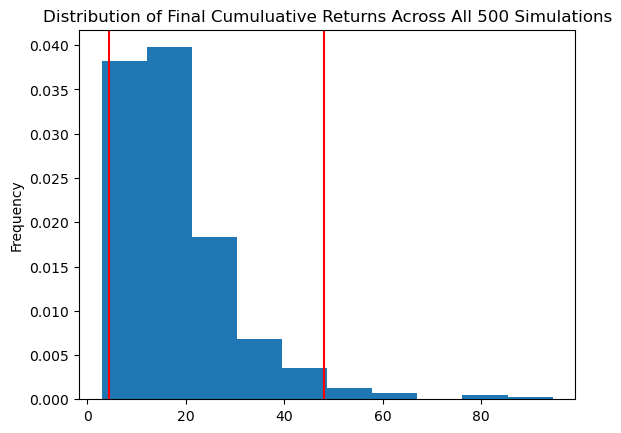

In [76]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30_year.plot_distribution()

### Retirement Analysis

In [77]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats = MC_30_year.summarize_cumulative_return()

# Print summary statistics
print(summary_stats)

count           500.000000
mean             18.255391
std              11.891271
min               2.954317
25%              10.105230
50%              15.433449
75%              23.144980
max              94.490071
95% CI Lower      4.460318
95% CI Upper     48.021882
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [78]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_stats.iloc[8]*initial_investment,2)
ci_upper = round(summary_stats.iloc[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $89206.37 and $960437.65


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [79]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary_stats.iloc[8]*initial_investment,2)
ci_upper = round(summary_stats.iloc[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $133809.55 and $1440656.47


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [80]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [81]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006324,1.014896,1.015129,0.998693,1.001826,1.000473,0.999562,1.002597,0.996348,1.000414,...,0.999713,1.002835,1.005604,1.002663,0.982656,1.008668,0.989110,1.005742,1.003317,0.999898
2,1.013122,1.020955,1.028754,0.999566,1.000989,1.004849,1.004619,1.002622,0.988363,1.008987,...,0.999975,1.011203,1.017845,1.011241,0.976919,1.003990,0.988540,0.985907,1.001260,0.995186
3,1.024068,1.026042,1.022614,1.001304,1.004284,0.997428,1.012168,1.002384,1.003228,1.012381,...,1.001023,1.020141,1.015658,1.003203,0.979669,0.996366,0.992938,0.983188,0.998512,0.989589
4,1.027982,1.028876,1.018467,0.999750,1.008719,0.988524,1.016935,1.009449,1.005060,1.013252,...,1.012216,1.012632,1.009983,1.010371,0.975810,0.996868,0.993914,0.976282,0.992657,0.984567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.660248,1.557279,2.126323,0.947683,4.168529,2.389218,1.866825,1.875500,1.048198,1.734243,...,0.930079,1.405617,1.381825,1.196934,1.809438,0.943552,1.408189,1.229679,1.287180,1.284603
1257,1.661087,1.565251,2.159570,0.946760,4.111056,2.378972,1.877509,1.882544,1.066314,1.739996,...,0.923848,1.404024,1.387263,1.188197,1.786585,0.943807,1.405410,1.235925,1.296581,1.276927
1258,1.666974,1.563638,2.159481,0.937281,4.104969,2.404140,1.899003,1.888671,1.067047,1.774074,...,0.929857,1.403921,1.389681,1.183290,1.771347,0.949863,1.403045,1.224581,1.295627,1.283365
1259,1.670217,1.563178,2.160649,0.931041,4.151552,2.430272,1.908758,1.914102,1.072859,1.774445,...,0.921823,1.405835,1.380356,1.180770,1.769963,0.949172,1.411342,1.223010,1.291284,1.295824


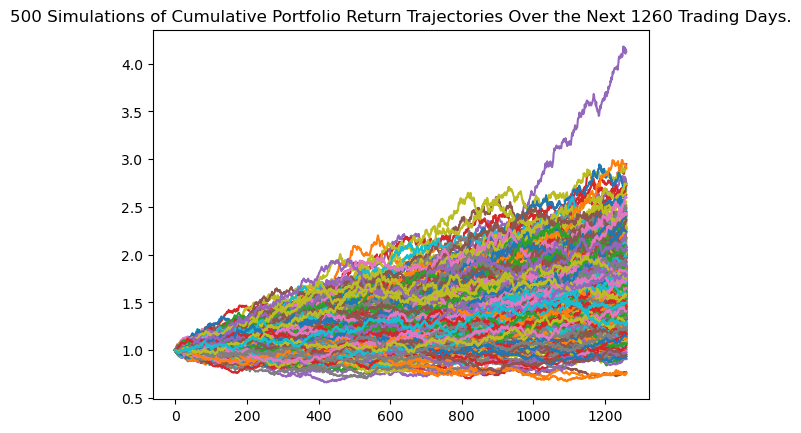

In [82]:
# Plot simulation outcomes
five_year_line_plot = MC_5_year.plot_simulation()

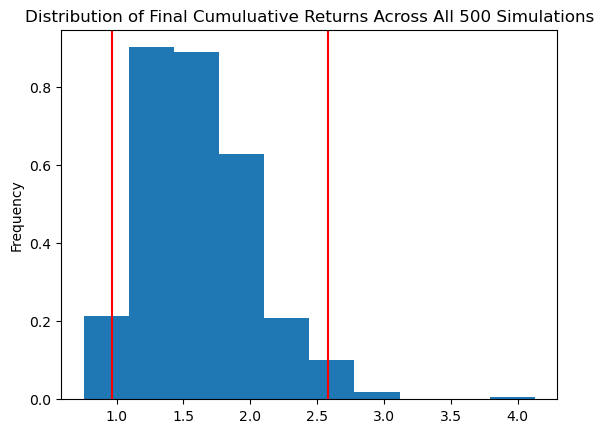

In [83]:
# Plot probability distribution and confidence intervals
five_year_dist_plot = MC_5_year.plot_distribution()

In [84]:
# Fetch summary statistics from the Monte Carlo simulation results
five_year_summary = MC_5_year.summarize_cumulative_return()

# Print summary statistics
print(five_year_summary)

count           500.000000
mean              1.620072
std               0.422512
min               0.756309
25%               1.329184
50%               1.560613
75%               1.864971
max               4.127722
95% CI Lower      0.964867
95% CI Upper      2.577352
Name: 1260, dtype: float64


In [85]:
# Set initial investment
initial_investment = 48000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_five = round(five_year_summary.iloc[8]*initial_investment,2)
ci_upper_five = round(five_year_summary.iloc[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $48000 in the portfolio over the next 5 years will end within in the range of $46313.63 and $123712.88


### Ten Years Retirement Option

In [100]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [101]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997037,0.992903,0.992914,1.015061,1.009214,0.998705,0.994290,1.021450,1.005789,0.991872,...,0.995488,1.006510,0.997707,1.010586,1.000002,0.997108,1.019075,0.979487,0.999695,0.980259
2,0.991279,0.987898,0.990558,1.012960,1.020061,1.008671,0.994103,1.014176,1.010113,1.002932,...,1.005017,0.999673,1.000106,1.010799,1.011717,0.998750,1.011840,0.975661,0.998592,0.977041
3,0.993152,0.971202,0.999221,1.016717,1.032176,1.024965,1.011139,1.021281,1.012336,1.018183,...,1.019107,0.999191,0.986057,1.005217,1.022139,1.003246,1.025192,0.973312,1.003031,0.992555
4,0.991518,0.983879,1.006764,1.013689,1.028620,1.040205,1.023258,1.011507,1.017275,1.032499,...,1.016664,0.992723,0.994196,1.002937,1.026416,1.022062,1.021040,0.976282,1.005658,0.989397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,5.344600,1.883530,2.101976,3.171068,4.145121,2.190639,1.864267,1.961168,2.204671,3.033698,...,3.098632,3.895484,2.083758,2.878285,1.876331,2.150252,2.064650,2.998699,3.144225,2.269492
2517,5.349952,1.862297,2.134544,3.156971,4.104755,2.183478,1.879094,1.959554,2.189210,3.052409,...,3.075028,3.812644,2.056533,2.885093,1.899401,2.162408,2.058389,2.963866,3.093355,2.301074
2518,5.256168,1.855629,2.106161,3.111515,4.121782,2.195193,1.853149,1.969756,2.166437,3.125509,...,3.075537,3.867986,2.033421,2.892817,1.916067,2.145837,2.031066,2.992515,3.056509,2.275410
2519,5.241517,1.867794,2.107653,3.142373,4.102394,2.182884,1.866449,1.978558,2.172069,3.139783,...,3.063150,3.899699,2.017272,2.890244,1.879963,2.132637,2.013034,3.025171,3.055284,2.246391


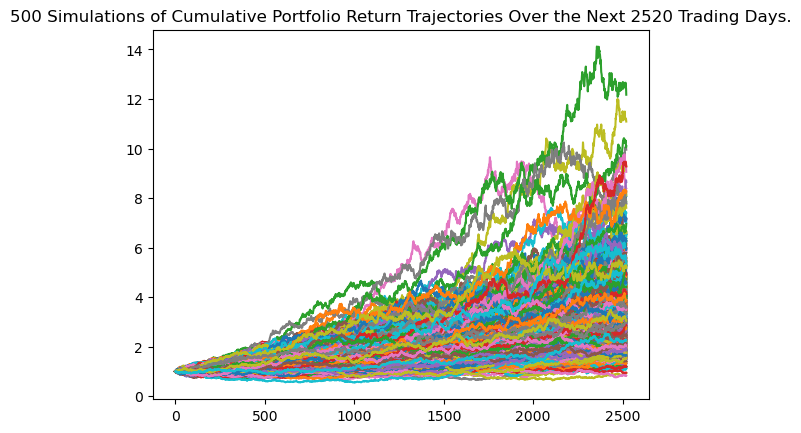

In [102]:
# Plot simulation outcomes
tenyear_line_plot = MC_10_year.plot_simulation()

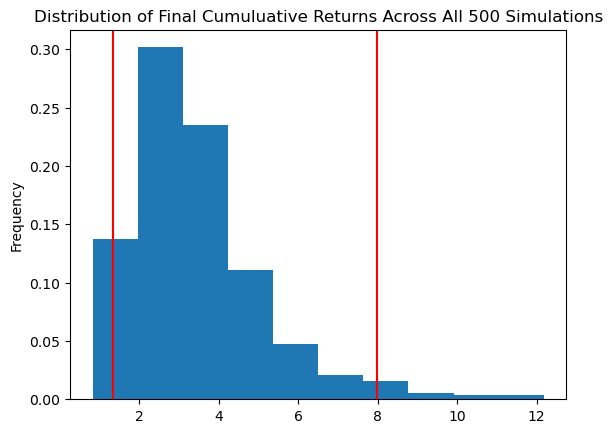

In [103]:
# Plot probability distribution and confidence intervals
tenyear_dist_plot = MC_10_year.plot_distribution()

In [104]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_10_year = MC_10_year.summarize_cumulative_return()

# Print summary statistics
print(summary_10_year)

count           500.000000
mean              3.456034
std               1.668718
min               0.834797
25%               2.287976
50%               3.120577
75%               4.131140
max              12.174023
95% CI Lower      1.334332
95% CI Upper      7.974121
Name: 2520, dtype: float64


In [105]:
# Set initial investment
initial_investment = 27000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(summary_10_year.iloc[8]*initial_investment,2)
ci_upper_ten = round(summary_10_year.iloc[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $27000 in the portfolio over the next 10 years will end within in the range of $36026.97 and $215301.27
